In [22]:
from nearline_helpers import *
%jsroot on

In [23]:
indir = '../bin/run302/'
runs = [302]

t = r.TChain('tree')
for run in runs:
    t.Add(os.path.join(indir, f'*{run}*root'))
t.GetEntries()

9641

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


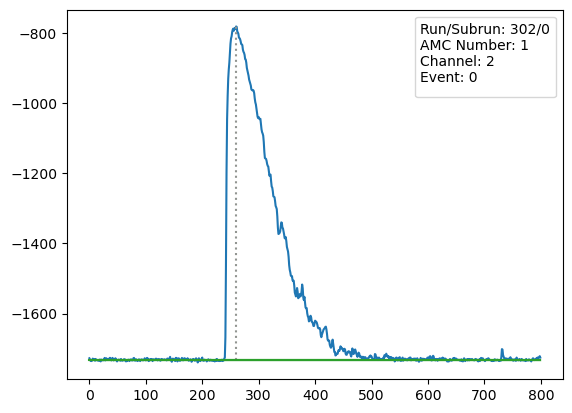

In [24]:
for i, e in enumerate(t):
    for wf in e.waveforms_corr:
        break 
    break 
plot_waveform(wf)
plt.show()

In [25]:
rf_period_ns = 19.8
rf_frequency_hz = 1/19.8
print(f'{rf_frequency_hz=}')
ct_to_ns = 1.25
rf_frequency_ct = rf_frequency_hz/ct_to_ns
rf_frequency_ct

rf_frequency_hz=0.050505050505050504


0.0404040404040404

In [26]:
1/19.8*ct_to_ns

0.06313131313131314

In [27]:
func = r.TF1("func", '[0]*TMath::Sin(2*TMath::Pi()*[1]*x + [2]) + [3]', 0,200,4)
func.SetParameter(0,10)
# func.SetParameter(1,rf_frequency_ct)
func.FixParameter(1, rf_frequency_ct)
func.SetParameter(2,0)
func.SetParameter(3,0)
func.SetNpx(10000)

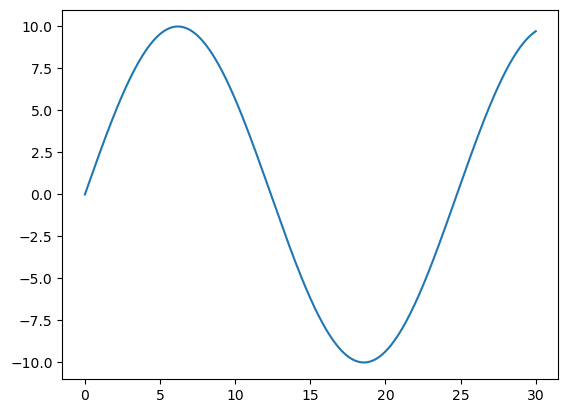

In [28]:
xs = np.linspace(0,30,10000)
ys = [func.Eval(xi) for xi in xs]
plt.plot(xs,ys)

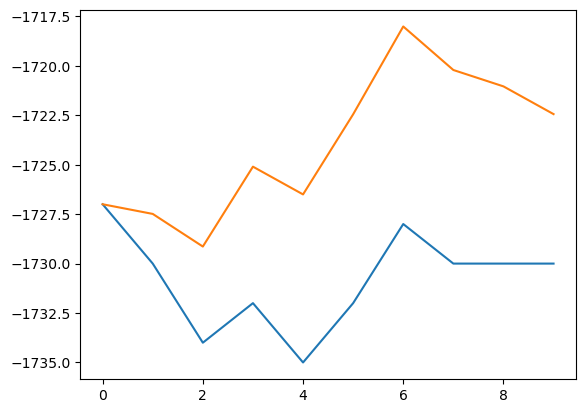

In [29]:
trace_orig = np.array(wf.trace,dtype=float).copy()
trace = np.array(wf.trace,dtype=float).copy()
trace = trace+[func.Eval(i) for i in range(len(trace))]
plt.plot(wf.trace[:10])
plt.plot(trace[:10])
plt.show()

In [30]:
gri = r.TGraph()
for i in range(len(trace)):
    gri.SetPoint(i, i, trace[i])
c =r.TCanvas()
gri.Draw()
c.Draw()

In [31]:
gri.Fit(func,"LRS")


****************************************
Minimizer is Minuit / Migrad
Chi2                      =      1354.72
NDf                       =          198
Edm                       =  1.35942e-06
NCalls                    =          103
p0                        =      10.0903   +/-   0.262483    
p1                        =     0.040404                      	 (fixed)
p2                        =    0.0114012   +/-   0.0257131   
p3                        =     -1731.03   +/-   0.184538    


In [32]:
c = r.TCanvas()
gri.Draw()
c.Draw()

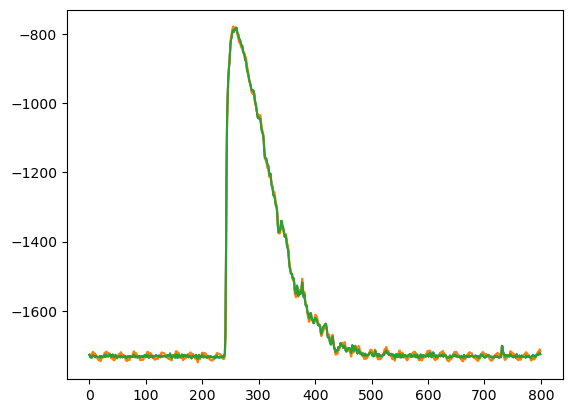

In [38]:
t2 = []
for i in range(len(trace)):
    t2.append(
        trace[i] - func.Eval(i) + wf.pedestalLevel
    )
plt.plot(trace_orig)
plt.plot(trace)
plt.plot(t2)